In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)

mouse_drug_data_to_load = os.path.join("data", "mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)                                           

# Combine the data into a single dataset
data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [231]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_mean = data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
                        
tumor_response_mean_df = pd.DataFrame(tumor_response_mean).reset_index()\
                        .rename(columns={"Tumor Volume (mm3)":"Tumor Vol (mm3) - Mean"})
tumor_response_mean_df.head()

,Drug,Timepoint,Tumor Vol (mm3) - Mean
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [239]:
tumor_response_mean

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
                          ...    
Zoniferol  25           55.432935
           30           57.713531
           35           60.089372
           40           62.916692
           45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [234]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_sem = data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
                           
tumor_response_sem_df = pd.DataFrame(tumor_response_sem).reset_index()\
                            .rename(columns={"Tumor Volume (mm3)":"Tumor Vol (mm3) - Standar Error"})
tumor_response_sem_df.head()

,Drug,Timepoint,Tumor Vol (mm3) - Standar Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [236]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_mean_pivot = tumor_response_mean_df.pivot(index="Timepoint", columns="Drug", values="Tumor Vol (mm3) - Mean")
tumor_vol_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


TypeError: legend only accepts two non-keyword arguments

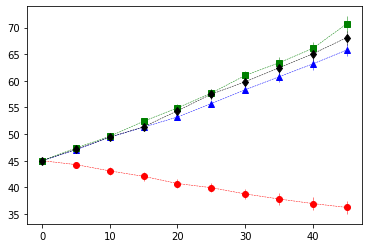

In [260]:

# Generate the Plot (with Error Bars)
drug_format_list = [("Capomulin","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black")]
for drug,marker,colors in drug_format_list:
    xerror = tumor_response_sem[drug]
    tumor_treatment_plot = plt.errorbar(tumor_vol_mean_pivot.index,tumor_vol_mean_pivot[drug],xerror,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)

plt.legend("Capomulin", "Infubinol", "Ketapril", "Placebo")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.legend(loc="best")
# Save the Figure
#plt.savefig(os.path.join('figures','tumor_response_to_treatment.png'))

In [198]:
# Show the Figure
#plt.show()

## Metastatic Response to Treatment

In [199]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_mean = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"])\
                                .reset_index()\
                                .rename(columns={"Metastatic Sites":"Metastatic Sites - Mean"})
metastatic_response_mean.head()

,Drug,Timepoint,Metastatic Sites - Mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [200]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_sem = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"])\
                            .reset_index()\
                            .rename(columns={"Metastatic Sites":"Metastatic Sites - Sem"})
metastatic_response_sem.head()

,Drug,Timepoint,Metastatic Sites - Sem
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [201]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_mean_pivot = metastatic_response_mean.pivot(index="Timepoint", columns="Drug")
tumor_vol_mean_pivot.head()

Metastatic Sites - Mean                                          \
Drug                    Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                                   
0                        0.000000  0.000000  0.000000  0.000000  0.000000   
5                        0.160000  0.380952  0.280000  0.304348  0.260870   
10                       0.320000  0.600000  0.666667  0.590909  0.523810   
15                       0.375000  0.789474  0.904762  0.842105  0.857143   
20                       0.652174  1.111111  1.050000  1.210526  1.150000   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.375000  0.320000  0.120000  0.240000  0.166667  
10         0.833333  0.565217  0.250000  0.478261  0.500000  
15         1.250000  0.764706  0.333333  0.782609  0.809524  
20         1.526316  1.000000  0.347826  0.952381  1.294118

In [202]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

## Survival Rats

In [203]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
rats_count = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"])\
                        .reset_index()\
                        .rename(columns={"Mouse ID":"Mouse Count"})

rats_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [205]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = rats_count.pivot(index="Timepoint", columns="Drug")
mouse_count_pivot.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [217]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [259]:
# Calculate the percent changes for each drug
percentage_change = (tumor_vol_mean_pivot.iloc[-1]/(tumor_vol_mean_pivot.iloc[0])-1)*100

# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:

# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()